# PhD odyssey sentiment analysis 

## Expected directory structure


* Dataset <- Store all the files in .txt 

## In this Notebook:

* Data pre-processing

      1. Convert the word and pdf files in .txt
      2. Split the text in line with author name 
      3. Remove special characters
      4. POS tag
      5. Lemmatization


* PhD odyssey sentiment analysis using  

      1. Vader
      2. TextBlob
      3. Flair (Flair pretrained sentiment analysis model is trained on IMDB dataset)
      4. SentiWordNet (I also used this one, but I think, it is not working well for this data)
      
* Output 

      1. Positive sentence
      2. Negative sentence
      3. Neutral sentence
      


## Libraries

In [42]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from flair.models import TextClassifier
from flair.data import Sentence

[nltk_data] Downloading package punkt to /home/tourist800/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tourist800/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/tourist800/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/tourist800/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


## Create DF

In [43]:
def create_df(folder_path):
    files = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    
    df_list = []
    
    for file in files:
        file_path_open = folder_path+ "/" + file
        with open(file_path_open, encoding="utf8", errors='ignore') as f:
            file_read = f.read()
            
            text_split = file_read.split(".")
            for i in range(0,len(text_split),1):
                remove_newline = text_split[i].replace('\n', ' ').replace('\r', '')
                if len(remove_newline.split(" "))>2:
                    df_list.append([remove_newline,file.replace('.txt','')])
                
    return df_list

In [44]:
folder_path = 'Dataset'

In [45]:
pd_list = create_df(folder_path)

In [46]:
len(pd_list)

1703

In [47]:
df = pd.DataFrame(pd_list, columns = ['Sentence', 'Author_name'])

In [48]:
df.Author_name.value_counts()

Erin's story - dropout          497
Jean-Yang                       304
Per-Olof-Arnäs                  236
Luca-Forcucci                   167
Elena's story                   121
Katrin-Franke                   108
Jillian's story                  66
Joshua-Dawes                     55
Jack's story                     50
Geneviève-Grégoire-Labrecque     43
Vasanth-Sarathy                  31
Simona-Alexandra                 25
Name: Author_name, dtype: int64

In [49]:
df.to_csv('phd_odyssey_sentiment_analysis.csv')

## Data preprocessing

Removes all special characters and numericals leaving the alphabets

In [50]:
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.replace('\r', '').replace('\n', '')
    return text

POS tagger dictionary

In [51]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

Obtaining the stem words – Lemmatization

In [52]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [53]:
df['Sentence_clean'] = df['Sentence'].apply(clean)

In [54]:
df['POS_tagged'] = df['Sentence_clean'].apply(token_stop_pos)

In [55]:
df['Lemma'] = df['POS_tagged'].apply(lemmatize)

In [56]:
df = df.loc[df['Lemma'].str.contains(r'[^\x00-\x7F]+') == False]

In [57]:
df

,Sentence,Author_name,Sentence_clean,POS_tagged,Lemma
0,"Our @csmcr alumni - Simona Alexandra, helping ...",Simona-Alexandra,Our csmcr alumni Simona Alexandra helping buil...,"[(csmcr, n), (alumni, n), (Simona, n), (Alexan...",csmcr alumnus Simona Alexandra help build so...
1,She studied BSc in Software Engineering and g...,Simona-Alexandra,She studied BSc in Software Engineering and g...,"[(studied, v), (BSc, n), (Software, n), (Engin...",study BSc Software Engineering graduate June
2,Hello Simona! Can you tell us a bit about yo...,Simona-Alexandra,Hello Simona Can you tell us a bit about your...,"[(Hello, n), (Simona, n), (tell, v), (us, None...",Hello Simona tell us bit education universit...
3,"Similar to A levels in the UK, this was my in...",Simona-Alexandra,Similar to A levels in the UK this was my ini...,"[(Similar, a), (levels, n), (UK, n), (initial,...",Similar level UK initial foundation towards ...
4,What career has your BSc in software enginee...,Simona-Alexandra,What career has your BSc in software engineer...,"[(career, n), (BSc, n), (software, n), (engine...",career BSc software engineering lead graduat...
...,...,...,...,...,...
1698,Follow him on twitter: @matthew nolan Su...,Jack's story,Follow him on twitter matthew nolan Suggested...,"[(Follow, n), (twitter, n), (matthew, n), (nol...",Follow twitter matthew nolan Suggested post ...
1699,You need to log in or register to comment,Jack's story,You need to log in or register to comment,"[(need, v), (log, v), (register, n), (comment,...",need log register comment
1700,0 2021 Springer Nature Limited,Jack's story,Springer Nature Limited,"[(Springer, n), (Nature, n), (Limited, v)]",Springer Nature Limited
1701,All Rights Reserved,Jack's story,All Rights Reserved,"[(Rights, n), (Reserved, v)]",Rights Reserved


In [58]:
fin_data = pd.DataFrame(df[['Sentence', 'Author_name', 'Lemma']])

## Sentiment Analysis using VADER

In [59]:
analyzer = SentimentIntensityAnalyzer()

function to calculate vader sentiment

In [60]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [61]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [62]:
fin_data['Vader_Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [63]:
fin_data['Vader_Analysis'] = fin_data['Vader_Sentiment'].apply(vader_analysis)

In [64]:
fin_data

,Sentence,Author_name,Lemma,Vader_Sentiment,Vader_Analysis
0,"Our @csmcr alumni - Simona Alexandra, helping ...",Simona-Alexandra,csmcr alumnus Simona Alexandra help build so...,0.6597,Positive
1,She studied BSc in Software Engineering and g...,Simona-Alexandra,study BSc Software Engineering graduate June,0.0000,Neutral
2,Hello Simona! Can you tell us a bit about yo...,Simona-Alexandra,Hello Simona tell us bit education universit...,0.0000,Neutral
3,"Similar to A levels in the UK, this was my in...",Simona-Alexandra,Similar level UK initial foundation towards ...,0.0000,Neutral
4,What career has your BSc in software enginee...,Simona-Alexandra,career BSc software engineering lead graduat...,0.0000,Neutral
...,...,...,...,...,...
1698,Follow him on twitter: @matthew nolan Su...,Jack's story,Follow twitter matthew nolan Suggested post ...,0.3182,Neutral
1699,You need to log in or register to comment,Jack's story,need log register comment,0.0000,Neutral
1700,0 2021 Springer Nature Limited,Jack's story,Springer Nature Limited,-0.2263,Neutral
1701,All Rights Reserved,Jack's story,Rights Reserved,0.0000,Neutral


In [65]:
vader_counts = fin_data['Vader_Analysis'].value_counts()
vader_counts

Neutral     1207
Positive     398
Negative      98
Name: Vader_Analysis, dtype: int64

## Sentiment Analysis using TextBlob

function to calculate subjectivity

In [66]:
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

function to calculate polarity

In [67]:
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

function to analyze the reviews

In [68]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [69]:
fin_data['TextBlob_Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['TextBlob_Analysis'] = fin_data['TextBlob_Polarity'].apply(analysis)
fin_data.head()

,Sentence,Author_name,Lemma,Vader_Sentiment,Vader_Analysis,TextBlob_Polarity,TextBlob_Analysis
0,"Our @csmcr alumni - Simona Alexandra, helping ...",Simona-Alexandra,csmcr alumnus Simona Alexandra help build so...,0.6597,Positive,0.175325,Positive
1,She studied BSc in Software Engineering and g...,Simona-Alexandra,study BSc Software Engineering graduate June,0.0000,Neutral,0.000000,Neutral
2,Hello Simona! Can you tell us a bit about yo...,Simona-Alexandra,Hello Simona tell us bit education universit...,0.0000,Neutral,0.080000,Positive
3,"Similar to A levels in the UK, this was my in...",Simona-Alexandra,Similar level UK initial foundation towards ...,0.0000,Neutral,0.000000,Neutral
4,What career has your BSc in software enginee...,Simona-Alexandra,career BSc software engineering lead graduat...,0.0000,Neutral,-0.800000,Negative


In [70]:
tb_counts = fin_data.TextBlob_Analysis.value_counts()
tb_counts

Positive    746
Neutral     718
Negative    239
Name: TextBlob_Analysis, dtype: int64

## Sentiment Analysis using Flair

In [71]:
def flair_senti(text):
    sentence = Sentence(text)
    senti = classifier.predict(sentence)
    return senti

In [72]:
classifier = TextClassifier.load('en-sentiment')

2022-04-06 21:48:33,820 loading file /home/tourist800/.flair/models/sentiment-en-mix-distillbert_4.pt


In [73]:
fin_data['Flair_Analysis'] = fin_data['Lemma'].apply(flair_senti)


## Sentiment Analysis using SentiWordNet

In [74]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
            
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
            
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
            # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

In [75]:
fin_data['SWN_Polarity'] = df['POS_tagged'].apply(sentiwordnetanalysis)

In [76]:
fin_data['SWN_Analysis'] = fin_data['SWN_Polarity'].apply(analysis)

In [77]:
fin_data.head(4)

,Sentence,Author_name,Lemma,Vader_Sentiment,Vader_Analysis,TextBlob_Polarity,TextBlob_Analysis,Flair_Analysis,SWN_Polarity,SWN_Analysis
0,"Our @csmcr alumni - Simona Alexandra, helping ...",Simona-Alexandra,csmcr alumnus Simona Alexandra help build so...,0.6597,Positive,0.175325,Positive,None,0.0,Neutral
1,She studied BSc in Software Engineering and g...,Simona-Alexandra,study BSc Software Engineering graduate June,0.0000,Neutral,0.000000,Neutral,None,0.0,Neutral
2,Hello Simona! Can you tell us a bit about yo...,Simona-Alexandra,Hello Simona tell us bit education universit...,0.0000,Neutral,0.080000,Positive,None,0.0,Neutral
3,"Similar to A levels in the UK, this was my in...",Simona-Alexandra,Similar level UK initial foundation towards ...,0.0000,Neutral,0.000000,Neutral,None,0.0,Neutral


In [78]:
swn_counts= fin_data['SWN_Analysis'].value_counts()
swn_counts

Neutral     1690
Positive      13
Name: SWN_Analysis, dtype: int64

In [79]:
result_df = pd.DataFrame(fin_data[['Sentence', 'Author_name', 'Vader_Sentiment','Vader_Analysis','TextBlob_Polarity',
                                  'TextBlob_Analysis']])

In [80]:
result_df.Sentence[33]

' I am used to production and research of artists, but I also have been involved in what is called Electroacoustic Music'

In [81]:
result_df.to_csv('result.csv')

## Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x7f90280d8190>,
 [Text(-0.6707774118052713, 0.8718128605450952, 'Neutral'),
  Text(0.5030926215520689, -0.9782115385436153, 'Positive'),
  Text(1.3279989987247385, -0.24273166127658774, 'Negative')],
 [Text(-0.3658785882574207, 0.4755342875700519, '70.9%'),
  Text(0.27441415721021933, -0.5335699301146992, '23.4%'),
  Text(0.8361475177155759, -0.15283104598896263, '5.8%')])

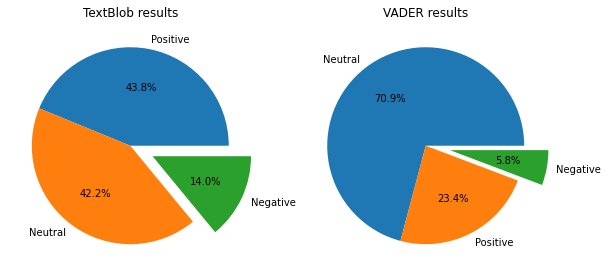

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.subplot(1,3,3)
# plt.title("SentiWordNet results")
# plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)